# Gradient Descent

In [40]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [41]:
a = np.array([1, 3, 2, 4])

In [42]:
a

array([1, 3, 2, 4])

In [43]:
type(a)

numpy.ndarray

In [44]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [45]:
A[0]

array([3, 1, 2])

In [46]:
C[2, 0]

4

In [47]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [48]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [49]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [50]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [51]:
A / A

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [52]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

In [53]:
# A + B

In [54]:
# A * B

### Dot product

In [55]:
A.shape

(2, 3)

In [56]:
B.shape

(3, 2)

In [57]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [58]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [59]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [60]:
C.shape

(6, 2)

In [61]:
A.shape

(2, 3)

In [62]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [63]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [64]:
df = pd.read_csv('../data/banknotes.csv')

In [65]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [66]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [67]:
import seaborn as sns

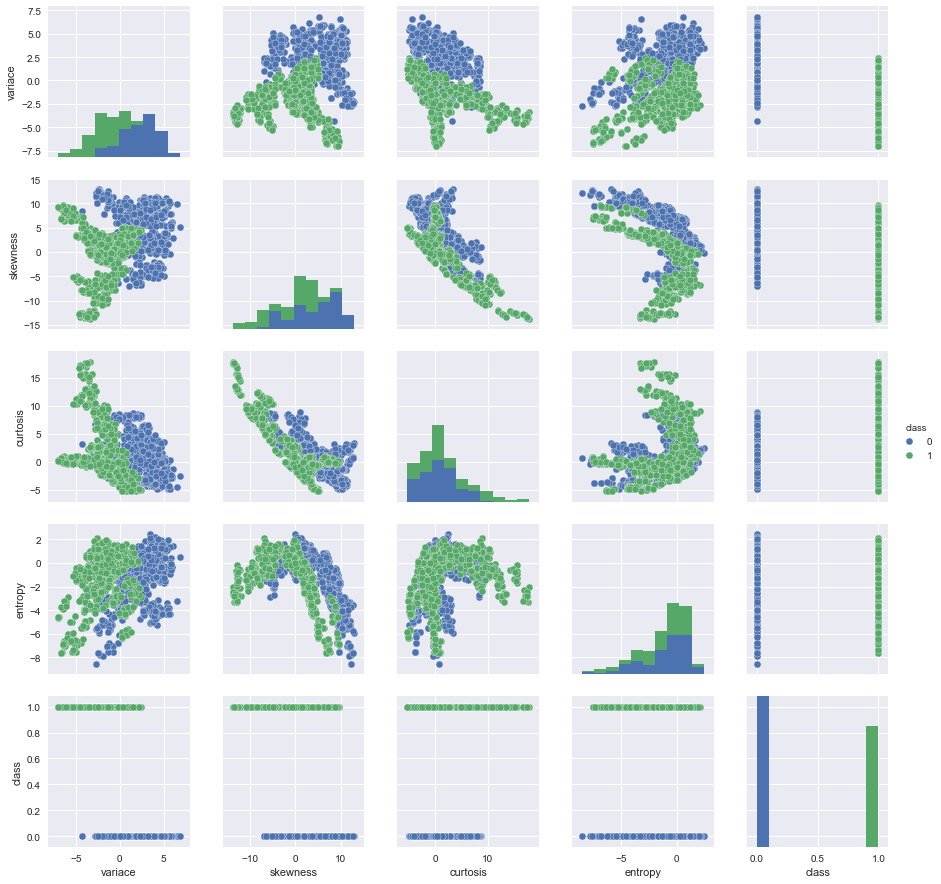

In [68]:
sns.pairplot(df, hue="class")

#### Baseline model

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [70]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [71]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

array([ 0.99126638,  0.99343545,  0.99124726])

### Logistic Regression Model

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [73]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [74]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.5493 - acc: 0.7125     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.4987 - acc: 0.7646     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.4588 - acc: 0.8125     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.4270 - acc: 0.8531     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.4014 - acc: 0.8833     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.3804 - acc: 0.9000     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.3630 - acc: 0.9052     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.3483 - acc: 0.9156     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.3358 - acc: 0.9219     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [75]:
historydf = pd.DataFrame(history.history, index=history.epoch)

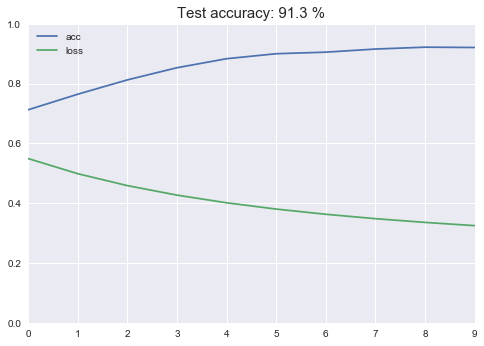

In [76]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [77]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [78]:
historydf = pd.concat(dflist, axis=1)

In [79]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.959375,0.365669,0.760417,0.518224,0.789583,0.478713,0.884375,0.309541
1,0.968750,0.334648,0.897917,0.350921,0.896875,0.308827,0.967708,0.135531
2,0.968750,0.312479,0.930208,0.286322,0.927083,0.242839,0.972917,0.098804
3,0.967708,0.295595,0.941667,0.246857,0.947917,0.202034,0.977083,0.081753
4,0.961458,0.282107,0.947917,0.219252,0.956250,0.174565,0.979167,0.072472
5,0.957292,0.270979,0.953125,0.198440,0.962500,0.154827,0.978125,0.065897
6,0.957292,0.261498,0.956250,0.182108,0.965625,0.140042,0.979167,0.061636
7,0.954167,0.253215,0.957292,0.168995,0.967708,0.128596,0.981250,0.057997
8,0.953125,0.245870,0.962500,0.158155,0.969792,0.119519,0.981250,0.055284
9,0.953125,0.239260,0.962500,0.149060,0.969792,0.112034,0.981250,0.053017


In [80]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [81]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.959375  0.365669  0.760417  0.518224  0.789583  0.478713   
1              0.968750  0.334648  0.897917  0.350921  0.896875  0.308827   
2              0.968750  0.312479  0.930208  0.286322  0.927083  0.242839   
3              0.967708  0.295595  0.941667  0.246857  0.947917  0.202034   
4              0.961458  0.282107  0.947917  0.219252  0.956250  0.174565   
5              0.957292  0.270979  0.953125  0.198440  0.962500  0.154827   
6              0.957292  0.261498  0.956250  0.182108  0.965625  0.140042   
7              0.954167  0.253215  0.957292  0.168995  0.967708  0.128596   
8              0.953125  0.245870  0.962500  0.158155  0.969792  0.119519   
9              0.953125  0.239260  0.962500  0.149060  0.969792  0.112034   

learning_rate      0.50            
metric              acc      loss  
0              0.884375  0.309541  
1              0.967708  0.135531  
2              0.972917  0.098804  
3              0.977083  0.081753  
4              0.979167  0.072472  
5              0.978125  0.065897  
6              0.979167  0.061636  
7              0.981250  0.057997  
8              0.981250  0.055284  
9              0.981250  0.053017

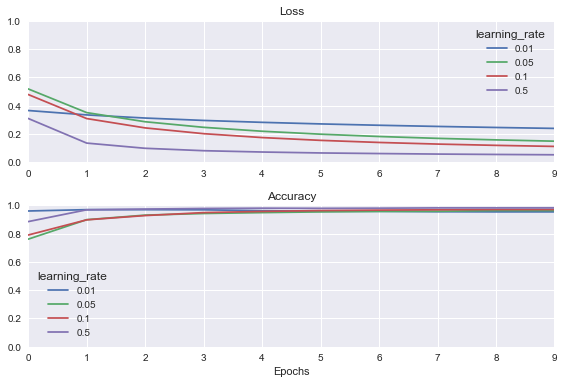

In [82]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [83]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [84]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [85]:
historydf

batch_size       16                  32                  64             \
metric           acc      loss       acc      loss       acc      loss   
0           0.746875  0.571997  0.582292  0.721255  0.841667  0.445773   
1           0.803125  0.517621  0.655208  0.663064  0.844792  0.439147   
2           0.835417  0.479062  0.726042  0.614378  0.847917  0.432803   
3           0.845833  0.449669  0.788542  0.573391  0.857292  0.426706   
4           0.859375  0.425926  0.829167  0.538594  0.859375  0.420893   
5           0.861458  0.406038  0.858333  0.508843  0.864583  0.415294   
6           0.875000  0.388912  0.866667  0.483228  0.866667  0.409907   
7           0.876042  0.373817  0.876042  0.460885  0.870833  0.404736   
8           0.882292  0.360276  0.895833  0.441342  0.869792  0.399745   
9           0.888542  0.347989  0.908333  0.424045  0.870833  0.394925   

batch_size       128            
metric           acc      loss  
0           0.470833  0.796566  
1           0.489583  0.786374  
2           0.507292  0.776578  
3           0.526042  0.767166  
4           0.536458  0.758094  
5           0.546875  0.749322  
6           0.555208  0.740821  
7           0.567708  0.732558  
8           0.579167  0.724600  
9           0.584375  0.716873

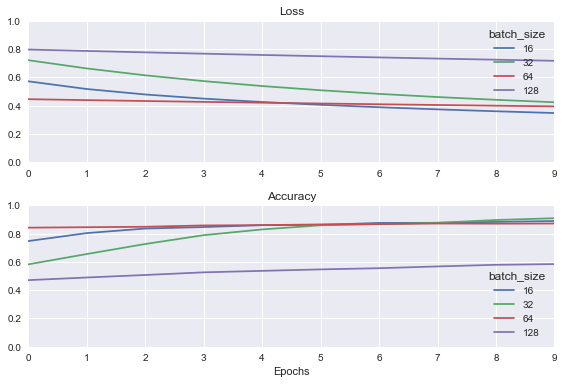

In [86]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [87]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [88]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [89]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

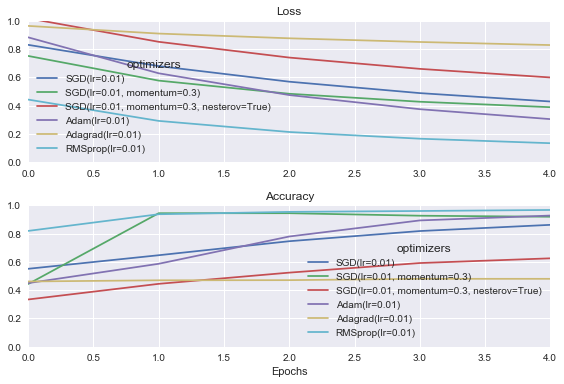

In [90]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [91]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [92]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx
historydf.head()

initializers     zeros             uniform              normal            \
metric             acc      loss       acc      loss       acc      loss   
0             0.790625  0.670483  0.789583  0.655130  0.492708  0.699047   
1             0.808333  0.636469  0.802083  0.622322  0.909375  0.661292   
2             0.807292  0.607265  0.816667  0.594089  0.900000  0.627450   
3             0.819792  0.580684  0.823958  0.567979  0.858333  0.597430   
4             0.832292  0.555982  0.828125  0.545042  0.844792  0.570491   

initializers he_normal           lecun_uniform            
metric             acc      loss           acc      loss  
0             0.187500  1.236049      0.505208  0.708191  
1             0.189583  1.168917      0.567708  0.672836  
2             0.191667  1.105819      0.628125  0.641533  
3             0.187500  1.048423      0.701042  0.612297  
4             0.191667  0.991831      0.743750  0.585263

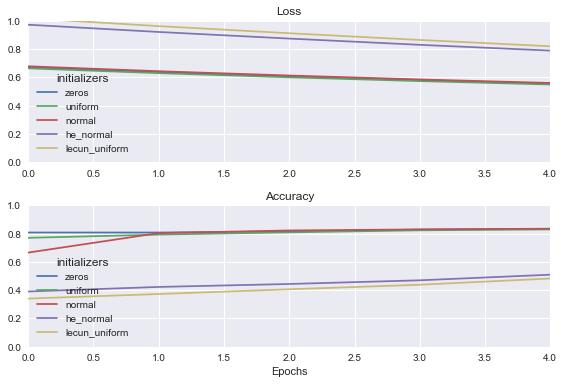

In [55]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [56]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 0s - loss: 0.4821 - acc: 0.9122 - val_loss: 0.3586 - val_acc: 0.9722
Epoch 2/20
672/672 [==============================] - 0s - loss: 0.2868 - acc: 0.9658 - val_loss: 0.2226 - val_acc: 0.9688
Epoch 3/20
672/672 [==============================] - 0s - loss: 0.1839 - acc: 0.9673 - val_loss: 0.1394 - val_acc: 0.9757
Epoch 4/20
672/672 [==============================] - 0s - loss: 0.1240 - acc: 0.9717 - val_loss: 0.0948 - val_acc: 0.9792
Epoch 5/20
672/672 [==============================] - 0s - loss: 0.0882 - acc: 0.9658 - val_loss: 0.0666 - val_acc: 0.9826
Epoch 6/20
672/672 [==============================] - 0s - loss: 0.0672 - acc: 0.9702 - val_loss: 0.0493 - val_acc: 0.9826
Epoch 7/20
672/672 [==============================] - 0s - loss: 0.0502 - acc: 0.9836 - val_loss: 0.0364 - val_acc: 0.9826
Epoch 8/20
672/672 [==============================] - 0s - loss: 0.0415 - acc: 0.9911 - val_l

In [57]:
result

[0.027392180274846484, 0.98786407766990292]

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.layers

In [60]:
inp = model.layers[0].input
out = model.layers[0].output

In [61]:
inp

<tf.Tensor 'dense_1_input:0' shape=(?, 4) dtype=float32>

In [62]:
out

<tf.Tensor 'dense_1/Relu:0' shape=(?, 2) dtype=float32>

In [63]:
features_function = K.function([inp], [out])

In [64]:
features_function

In [65]:
features_function([X_test])[0].shape

(412, 2)

In [66]:
features = features_function([X_test])[0]

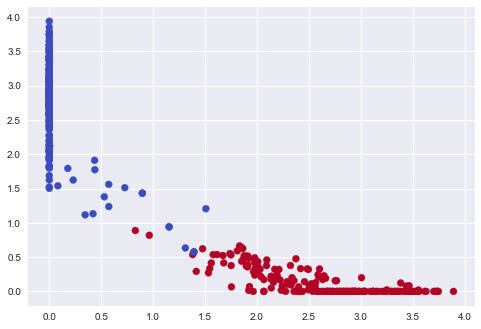

In [67]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [68]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

 32/412 [=>............................] - ETA: 0s

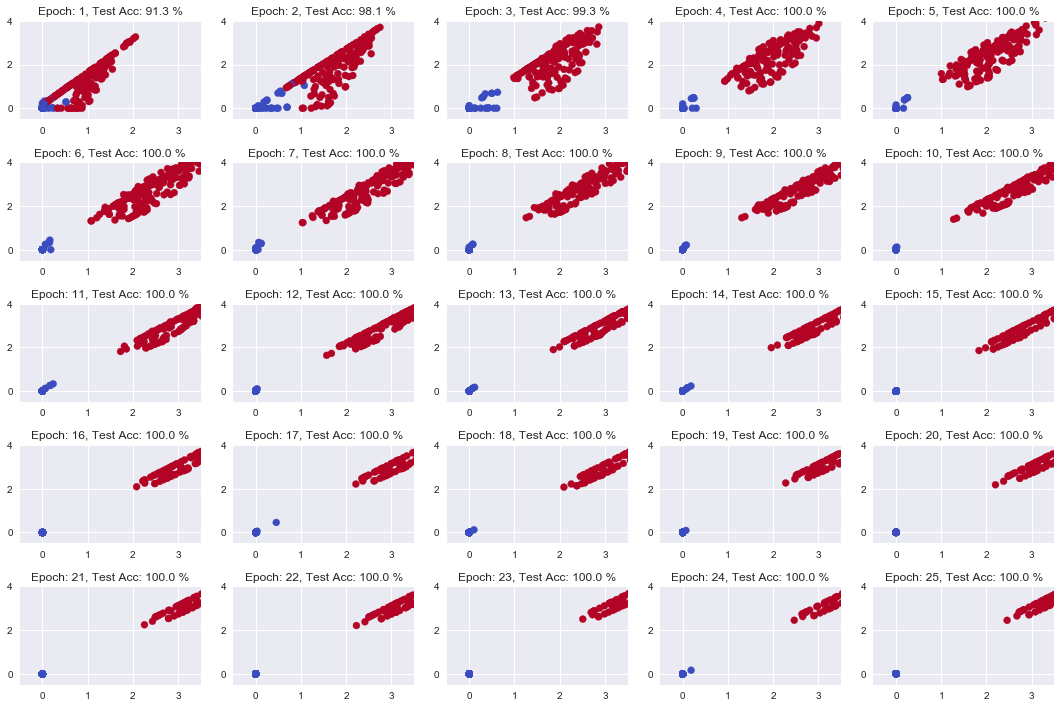

In [69]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard